In [19]:
#importing packages
import sklearn
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree



#read the csv file
data = pd.read_csv(r'/IrisNew.csv')
df = pd.DataFrame(data, columns=["Sepal Length","Sepal Width","Petal Length","Petal Width","Class"])
print(df)

     Sepal Length  Sepal Width  Petal Length  Petal Width      Class
0             4.3          3.0           1.1          0.1     setosa
1             4.4          2.9           1.4          0.2     setosa
2             4.4          3.0           1.3          0.2     setosa
3             4.4          3.2           1.3          0.2     setosa
4             4.5          2.3           1.3          0.3     setosa
..            ...          ...           ...          ...        ...
145           7.7          2.6           6.9          2.3  virginica
146           7.7          2.8           6.7          2.0  virginica
147           7.7          3.0           6.1          2.3  virginica
148           7.7          3.8           6.7          2.2  virginica
149           7.9          3.8           6.4          2.0  virginica

[150 rows x 5 columns]


In [20]:
#split the data into training and testing
X = df.values[:,0:4] # first 4 columns are independent variables
Y = df.values[:,4] # last column is dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=100)
#test size = 70% training and 30 percent testing


In [21]:
#building a decision tree model using entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy",random_state = 100)
clf_entropy.fit(X_train, y_train)
y_pred = clf_entropy.predict(X_test)
print("Predicted values:")
print(y_pred)
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)


Predicted values:
['virginica' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'setosa']
Accuracy :  95.55555555555556


In [22]:
#building a decision tree model using gini index
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Predicted values:
['virginica' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'setosa']
Accuracy :  95.55555555555556


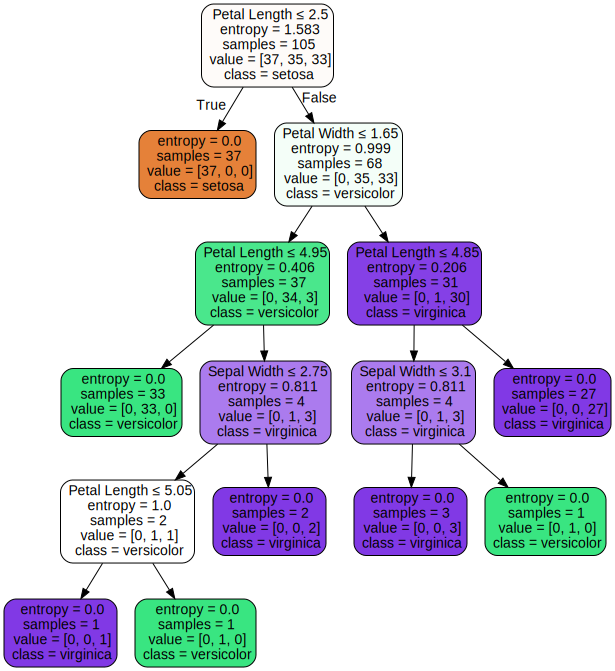

In [23]:
#Plotting the results using graphviz using criterion using as entropy
import graphviz
feature_cols = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
dot_data = tree.export_graphviz(clf_entropy, out_file=None,feature_names = feature_cols,
 class_names=['setosa','versicolor','virginica'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph


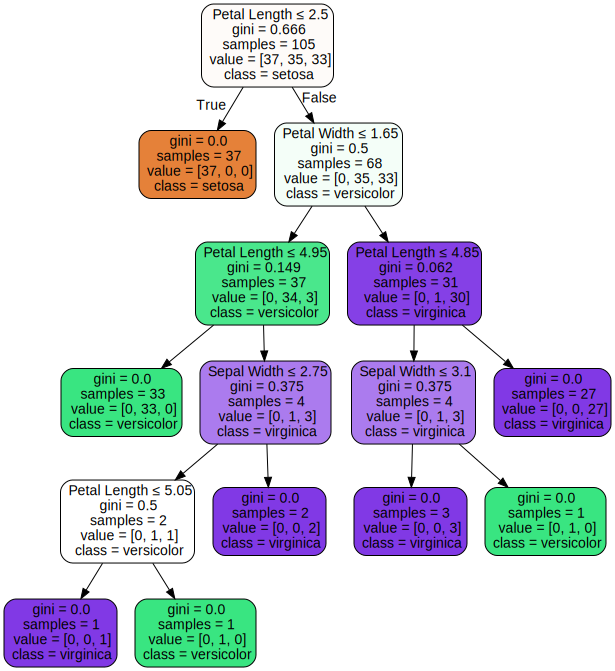

In [24]:
#Plotting the results using graphviz using criterion using as gini
import graphviz
feature_cols = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
dot_data = tree.export_graphviz(clf_gini, out_file=None,feature_names = feature_cols,
 class_names=['setosa','versicolor','virginica'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [25]:
#performing cross validation for model performance
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_entropy, X_train,y_train, cv=3)
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.91428571 0.94285714 0.97142857]
Mean accuracy: 0.942857142857143
